In [37]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Number of customers
num_customers = 900000

# Generate synthetic data
customer_ids = range(1, num_customers + 1)
target = np.random.choice([0, 1], num_customers)

# Ensure a noticeable difference in the distribution of all features
avg_spend_3months = np.random.normal(700, 100, num_customers)
avg_spend_3months[target == 1] += 50

balance = np.random.normal(1200, 200, num_customers)
balance[target == 1] -= 100

revenue = np.random.normal(60, 10, num_customers)
revenue[target == 1] += 5

# Generate the likelihood of calling for annual fee waiver based on the previous call
annual_fee_waiver_prob = np.random.uniform(0, 1, num_customers)
annual_fee_waiver_call = (annual_fee_waiver_prob < 0.7) | (target == 1)

# Create a DataFrame
data = {
    'customer_id': customer_ids,
    'avg_spend_3months': avg_spend_3months,
    'balance': balance,
    'revenue': revenue,
    'annual_fee_waiver_call': annual_fee_waiver_call.astype(int),
    'target': target
}

df = pd.DataFrame(data)

# Print the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
# df.to_csv('customer_dataset.csv', index=False)


   customer_id  avg_spend_3months      balance    revenue  \
0            1         626.451289   584.352167  51.010182   
1            2         792.022824  1338.924188  54.726075   
2            3         626.196896  1250.148588  69.775223   
3            4         622.199761   823.930253  61.056011   
4            5         688.963419  1243.649512  64.123559   

   annual_fee_waiver_call  target  
0                       1       0  
1                       1       1  
2                       1       0  
3                       1       0  
4                       0       0  


In [38]:
df.groupby('target')['avg_spend_3months'].agg('mean').reset_index()

,target,avg_spend_3months
0,0,699.900090
1,1,749.759612


In [39]:
df.groupby('target')['balance'].agg('mean').reset_index()

,target,balance
0,0,1200.047355
1,1,1099.806549


In [40]:
df.groupby('target')['revenue'].agg('mean').reset_index()

,target,revenue
0,0,59.992290
1,1,65.019131


In [41]:
df.groupby('target')['annual_fee_waiver_call'].agg('count').reset_index()

,target,annual_fee_waiver_call
0,0,450270
1,1,449730


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the dataset
# df = pd.read_csv('customer_dataset.csv')

# Select features and target variable
features = ['avg_spend_3months', 'balance', 'revenue', 'annual_fee_waiver_call']
target = 'target'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

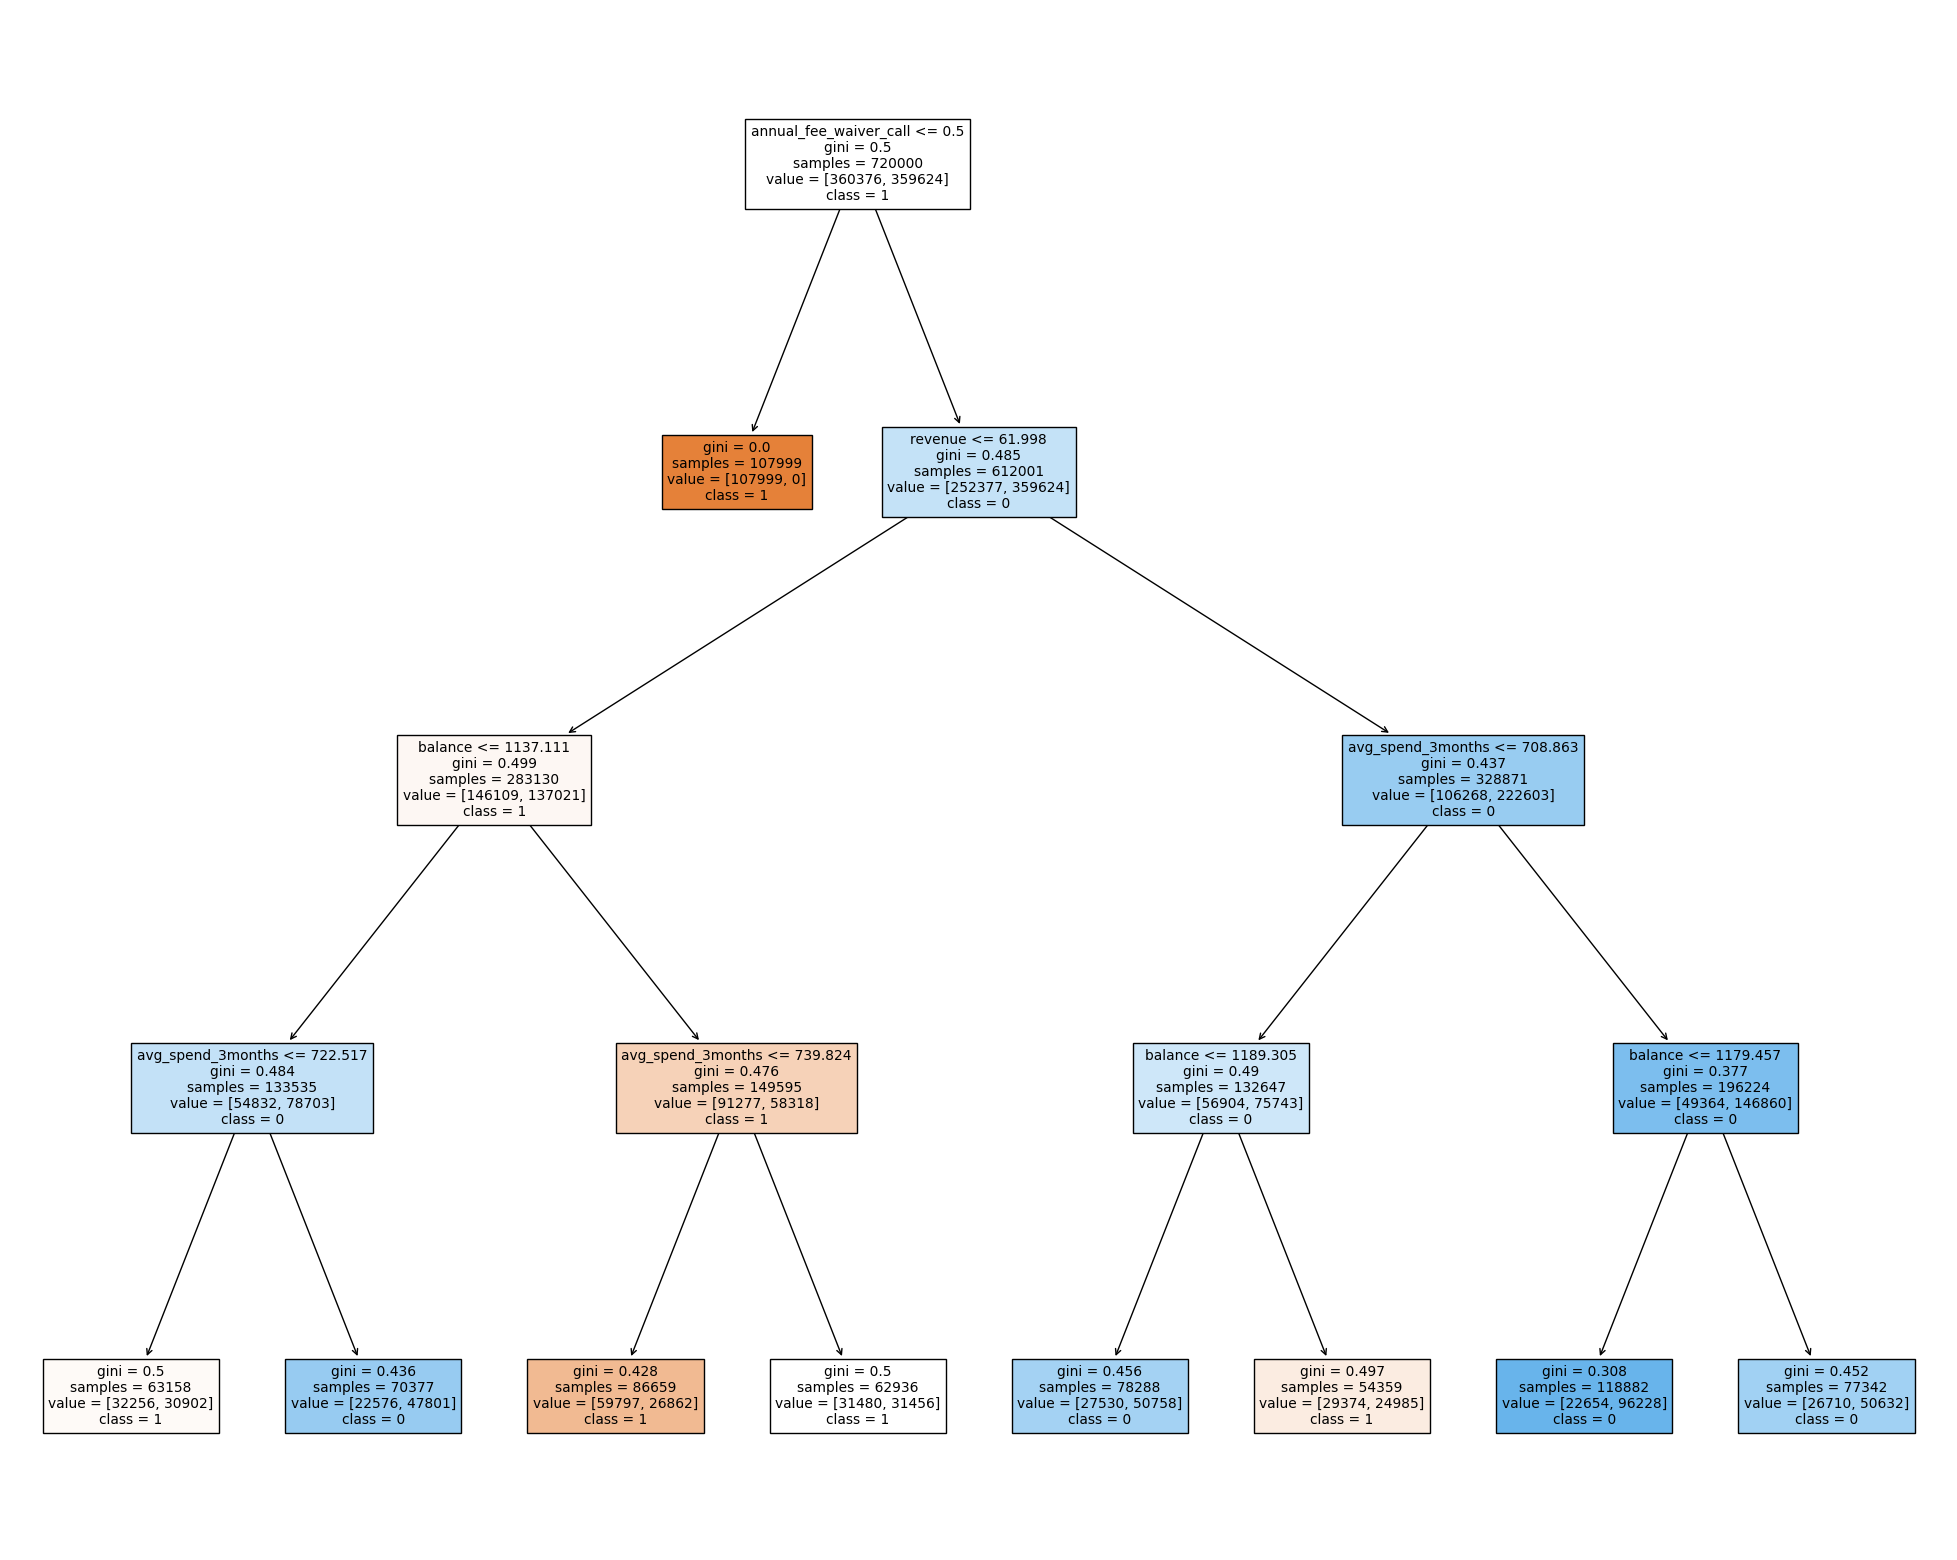

In [43]:


# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = 4)
dt_classifier.fit(X_train, y_train)
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=features,  
                   class_names=["1","0"],
                   filled=True)

In [44]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

F1 Score: 0.6973
AUC-ROC Score: 0.7787
Accuracy: 0.7033

Confusion Matrix:
[[65078 24816]
 [28585 61521]]


In [45]:
df.groupby('target')['customer_id'].agg('count').reset_index()

,target,customer_id
0,0,450270
1,1,449730


In [62]:
449730/(449730+450270)

0.4997

In [71]:
df.loc[df['annual_fee_waiver_call']>=0.5,'customer_id'].count()

765001

In [72]:
765001/(449730+450270)

0.8500011111111111

In [74]:
df.loc[df['revenue']>=62.65,'customer_id'].count()

445477

In [75]:
445477/(449730+450270)

0.49497444444444444

In [78]:
df.loc[df['balance']>=1137.11,'customer_id'].count()

472320

In [79]:
472320/(449730+450270)

0.5248

In [80]:
df.loc[df['avg_spend_3months']>=738.25,'customer_id'].count()

403733

In [81]:
403733/(449730+450270)

0.4485922222222222

In [90]:
df.loc[(df['annual_fee_waiver_call']>=0.5) | (df['revenue']>=62.65) | (df['balance']>=1137.11) | (df['avg_spend_3months']>=738.25) ,'customer_id'].count()

879977

In [91]:
879977/(449730+450270)

0.9777522222222222

In [94]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


In [97]:
average_response_rate

0.5005888888888889

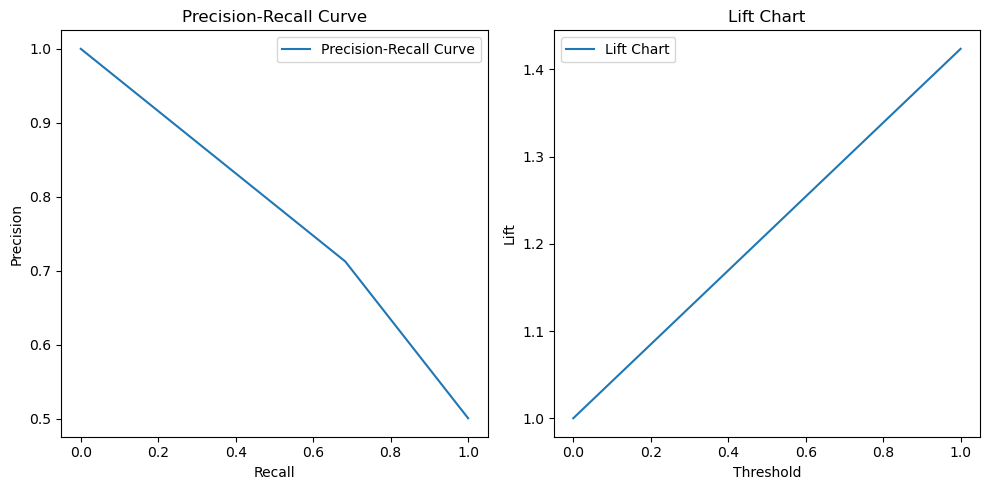

In [95]:
# Calculate lift for each threshold
average_response_rate = np.sum(y_test) / len(y_test)
lift = precision / average_response_rate

# Plot precision-recall curve and lift chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, lift[:-1], label='Lift Chart')
plt.xlabel('Threshold')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend()

plt.tight_layout()
plt.show()